In [1]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv3D, MaxPooling3D
from keras.optimizers import SGD
from keras.optimizers import RMSprop, Adam, SGD
from keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras import initializers
%matplotlib nbagg

Using TensorFlow backend.


In [2]:
im = cv2.imread('phone_dataset/57/frame0.jpg')
phone_directory = "phone_dataset/"
smoking_directory = "smoking_dataset/"

<class 'numpy.ndarray'>
(720, 1280, 3)


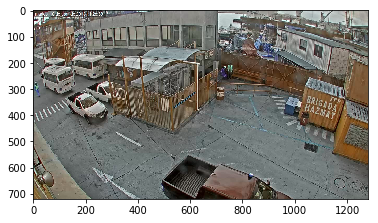

In [3]:
print(type(im))
print(im.shape)
plt.imshow(im)

#### Poblado de training set

In [5]:
def generator_conv3d():
    batch_size = 20
    while 1:
        for i in range(100):
            if i%10==0:
                print('i: {}'.format(i))
            yield [1]
    

In [ ]:
print('Loading data...')
#video_set = np.empty((74,1024,1280,3))
n_videoseq = len(os.listdir(phone_directory))
video_set_small = np.empty((n_videoseq,30,240,320,3))
video_set = np.empty((n_videoseq,30,480,640,3))
for sub_d in range(n_videoseq):
    for img_ite in range(len(os.listdir(phone_directory+str(sub_d)))):
        video_set[sub_d,img_ite,:,:,:] = cv2.resize(cv2.imread('phone_dataset/{}/frame{}.jpg'.format(sub_d,img_ite)),(640,480))
        video_set_small[sub_d,img_ite,:,:,:] = cv2.resize(cv2.imread('phone_dataset/{}/frame{}.jpg'.format(sub_d,img_ite)),(320,240))
        video_set[sub_d,img_ite,:,:,:]       /=255
        video_set_small[sub_d,img_ite,:,:,:] /=255
        
print('Load complete')

In [ ]:
print('Video shape:')
print(video_set.shape)
print(video_set_small.shape)

In [ ]:
plt.imshow(video_set[9,20,:,:,2])
y_train = pd.Series([0,1,1,1,1,0,1,0,1,1])

In [ ]:
y_train = pd.read_csv('train_labels.csv')

In [ ]:
y_train = y_train.drop('id',axis=1)

In [ ]:
def generator(features, labels, batch_size):

 # Create empty arrays to contain batch of features and labels#

 batch_features = np.zeros((batch_size, 64, 64, 3))
 batch_labels = np.zeros((batch_size,1))

 while True:
   for i in range(batch_size):
     # choose random index in features
     index= random.choice(len(features),1)
     batch_features[i] = some_processing(features[index])
     batch_labels[i] = labels[index]
   yield batch_features, batch_labels

In [ ]:
print(type(video_set_small[9,20,:,:,2]))

In [ ]:
list = os.listdir('phone_dataset')
n_f=len(list)
print(n_f)

In [ ]:
print('Creating model..')

#input_shape = video_set_small.shape

In [ ]:
def create_model():
    model = Sequential()
    #model.add(Conv3D(4, kernel_size=(3, 3, 1), activation='relu', padding='same', input_shape=(30,480,640,3)))
    model.add(Conv3D(4, kernel_size=(3, 3, 1), activation='relu', padding='same', input_shape=(30,240,320,3)))
    model.add(Conv3D(8, kernel_size=(3, 3, 1), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 1)))

    model.add(Dropout(0.25))
    model.add(Conv3D(16, kernel_size=(3, 3, 1), activation='relu'))
    model.add(Conv3D(32, kernel_size=(3, 3, 1), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 1)))
    model.add(Dropout(0.25))
    model.add(Conv3D(64, kernel_size=(3, 3, 1), activation='relu'))
    model.add(MaxPooling3D(pool_size=(2, 2, 1)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [ ]:
model = create_model()
model.summary()
print('Model complete')

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(video_set_small,y_train,batch_size = 1, epochs=10)